<a href="https://colab.research.google.com/github/mab2004/kaggle-survey-insights/blob/main/kaggle_survey_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install missing packages if needed
!pip install pandas matplotlib seaborn

# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plots
sns.set(style="whitegrid")


In [ ]:
# Load dataset again, making sure first row (questions) becomes the column headers
df = pd.read_csv("kaggle_survey_2022_responses.csv", low_memory=False, header=1)

print("Shape of dataset:", df.shape)
df.head(5)


Shape of dataset: (23997, 296)


,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, university, or graduate)",On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai,...,"Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Reddit (r/machinelearning, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Kaggle (notebooks, forums, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Course Forums (forums.fast.ai, Coursera forums, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - YouTube (Kaggle YouTube, Cloud AI Adventures, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Blogs (Towards Data Science, Analytics Vidhya, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Journal Publications (peer-reviewed journals, conference proceedings, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Slack Communities (ods.ai, kagglenoobs, etc)",Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - None,Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Other
0,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
3,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
4,232,45-49,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


In [ ]:
# Drop duplicates (if any)
df = df.drop_duplicates()

# Replace empty strings with NaN for consistency
df = df.replace(r'^\s*$', np.nan, regex=True)

print("Shape after cleaning:", df.shape)


Shape after cleaning: (23996, 296)


In [ ]:
# Check missing value percentage
missing = df.isnull().mean().sort_values(ascending=False) * 100
print("Missing values (%):\n", missing.head(10))

# Drop columns with >50% missing values
df = df.loc[:, df.isnull().mean() < 0.5]

# Fill categorical NaNs with "Unknown"
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].fillna("Unknown")

print("Shape after handling missing:", df.shape)


Missing values (%):
 Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - None                                      100.0
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - None                                                         100.0
Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice - None                100.0
Do you use any of the following business intelligence tools? (Select all that apply) - Selected Choice - None                                                      100.0
Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice - None                                                        100.0
Do you use any of the following data products (relational databases, data warehouses, data lakes, or similar)? (Select all that apply)

In [ ]:
# Drop columns that are completely missing or only contain "None"
df = df.loc[:, df.notna().any()]  # keep only columns with at least 1 non-NaN
df = df.dropna(axis=1, how="all")  # safety step

print("Shape after dropping useless 'None' columns:", df.shape)
print("Remaining columns:\n", df.columns.tolist())


Shape after dropping useless 'None' columns: (23996, 15)
Remaining columns:
 ['Duration (in seconds)', 'What is your age (# years)?', 'What is your gender? - Selected Choice', 'In which country do you currently reside?', 'Are you currently a student? (high school, university, or graduate)', 'What products or platforms did you find to be most helpful when you first started studying data science?  (Select all that apply) - Selected Choice - Online courses (Coursera, EdX, etc)', 'What products or platforms did you find to be most helpful when you first started studying data science?  (Select all that apply) - Selected Choice - Video platforms (YouTube, Twitch, etc)', 'What products or platforms did you find to be most helpful when you first started studying data science?  (Select all that apply) - Selected Choice - Kaggle (notebooks, competitions, etc)', 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?', 'Have you ever publis

In [ ]:
# Basic overview of cleaned dataset
print("Dataset shape:", df.shape)
print("\nColumn data types:\n", df.dtypes)

# Age distribution
print("\nAge distribution:\n", df['What is your age (# years)?'].value_counts())

# Gender distribution
print("\nGender distribution:\n", df['What is your gender? - Selected Choice'].value_counts())

# Country (top 10)
print("\nTop 10 countries:\n", df['In which country do you currently reside?'].value_counts().head(10))

# Python usage
if "What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python" in df.columns:
    print("\nPython usage counts:\n", df["What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python"].value_counts())

# Education
if "What is the highest level of formal education that you have attained or plan to attain within the next 2 years?" in df.columns:
    print("\nEducation levels:\n", df["What is the highest level of formal education that you have attained or plan to attain within the next 2 years?"].value_counts())


Dataset shape: (23996, 15)

Column data types:
 Duration (in seconds)                                                                                                                                                                            int64
What is your age (# years)?                                                                                                                                                                     object
What is your gender? - Selected Choice                                                                                                                                                          object
In which country do you currently reside?                                                                                                                                                       object
Are you currently a student? (high school, university, or graduate)                                                                                         

/tmp/ipython-input-708415179.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


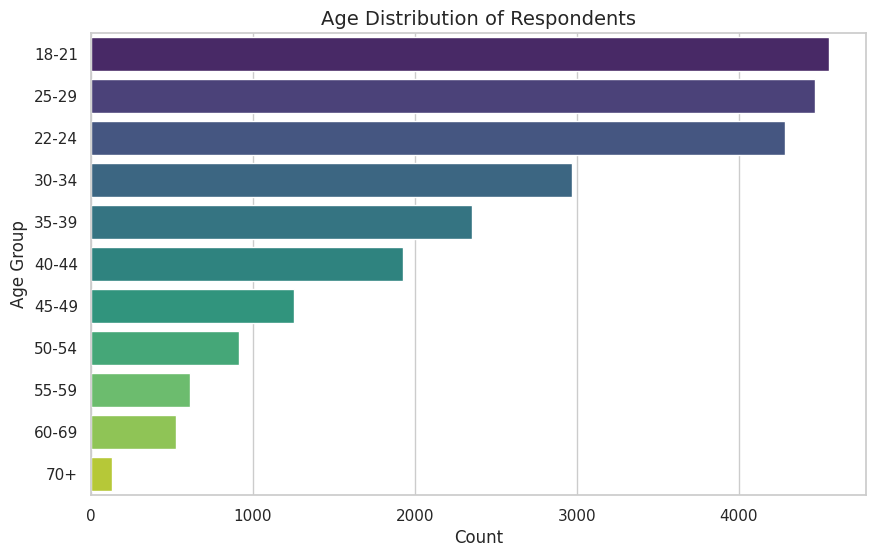

/tmp/ipython-input-708415179.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


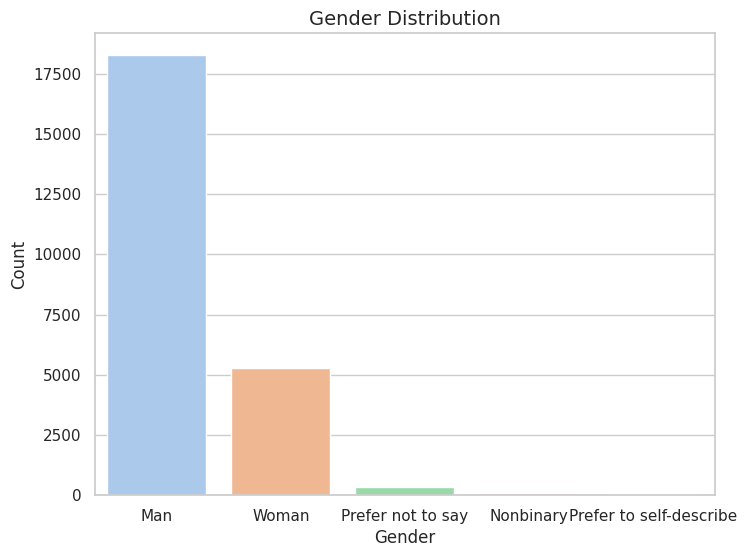

/tmp/ipython-input-708415179.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="cubehelix")


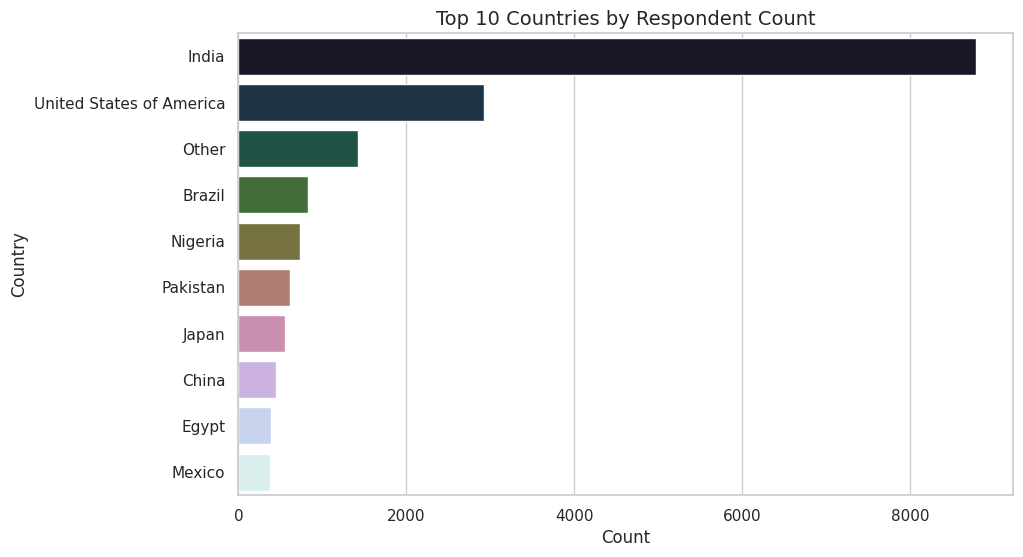

/tmp/ipython-input-708415179.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


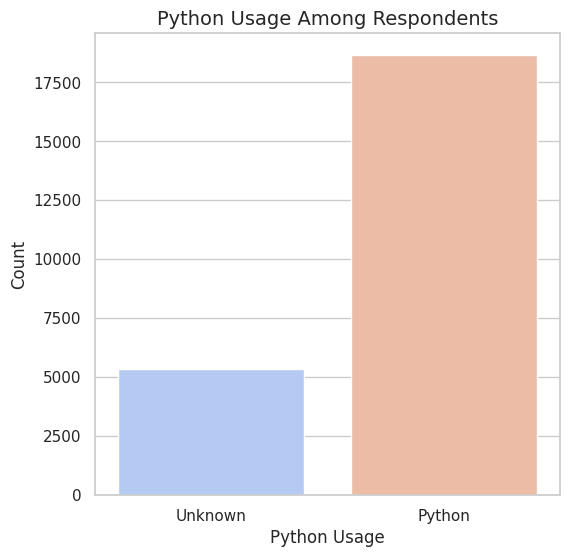

/tmp/ipython-input-708415179.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=edu_counts.values, y=labels, palette="mako")


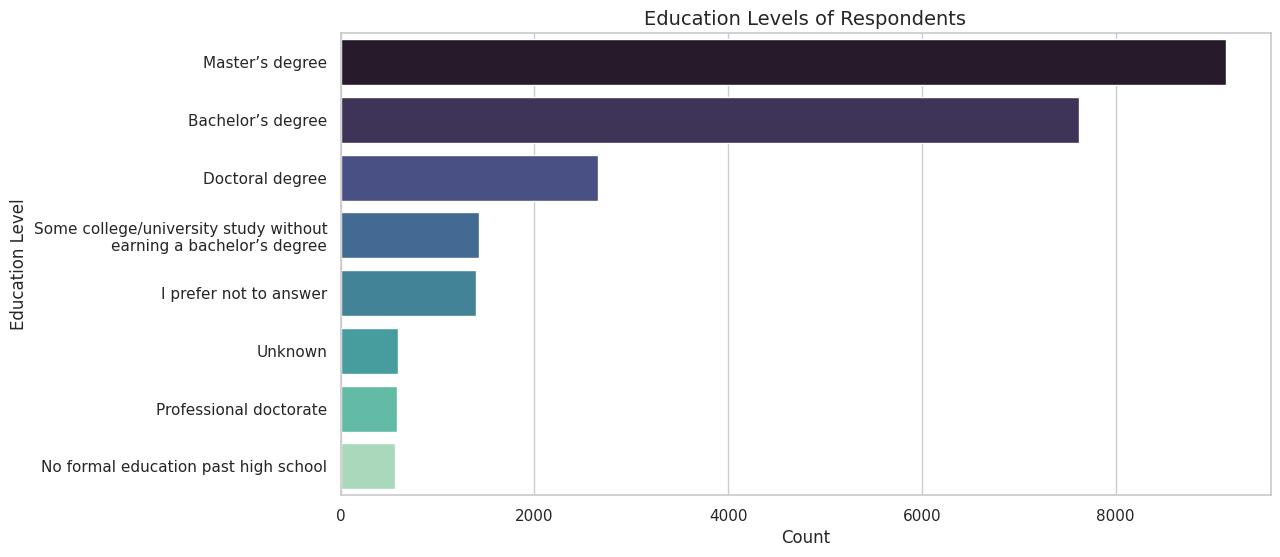

In [ ]:
import textwrap

# 1. Age distribution
plt.figure(figsize=(10, 6))
sns.countplot(
    y=df['What is your age (# years)?'],
    order=df['What is your age (# years)?'].value_counts().index,
    palette="viridis"
)
plt.title("Age Distribution of Respondents", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Age Group")
plt.show()

# 2. Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(
    x=df['What is your gender? - Selected Choice'],
    order=df['What is your gender? - Selected Choice'].value_counts().index,
    palette="pastel"
)
plt.title("Gender Distribution", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# 3. Top 10 countries
top_countries = df['In which country do you currently reside?'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="cubehelix")
plt.title("Top 10 Countries by Respondent Count", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

# 4. Python usage
plt.figure(figsize=(6, 6))
sns.countplot(
    x=df["What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python"],
    palette="coolwarm"
)
plt.title("Python Usage Among Respondents", fontsize=14)
plt.xlabel("Python Usage")
plt.ylabel("Count")
plt.show()

# 5. Education levels (fixed: wrap long labels)
edu_counts = df["What is the highest level of formal education that you have attained or plan to attain within the next 2 years?"].value_counts()
labels = [textwrap.fill(label, 40) for label in edu_counts.index]

plt.figure(figsize=(12, 6))
sns.barplot(x=edu_counts.values, y=labels, palette="mako")
plt.title("Education Levels of Respondents", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        # Fill missing values and ensure everything is string before encoding
        df_encoded[col] = df_encoded[col].fillna("Unknown").astype(str)
        df_encoded[col] = le.fit_transform(df_encoded[col])

print("Shape after encoding:", df_encoded.shape)
print(df_encoded.head())


Shape after encoding: (23996, 15)
   Duration (in seconds)  What is your age (# years)?  \
0                    121                            3   
1                    462                            3   
2                    293                            0   
3                    851                            8   
4                    232                            6   

   What is your gender? - Selected Choice  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   In which country do you currently reside?  \
0                                         20   
1                                          0   
2                                         13   
3                                         15   
4                                         20   

   Are you currently a student? (high school, university, or gr

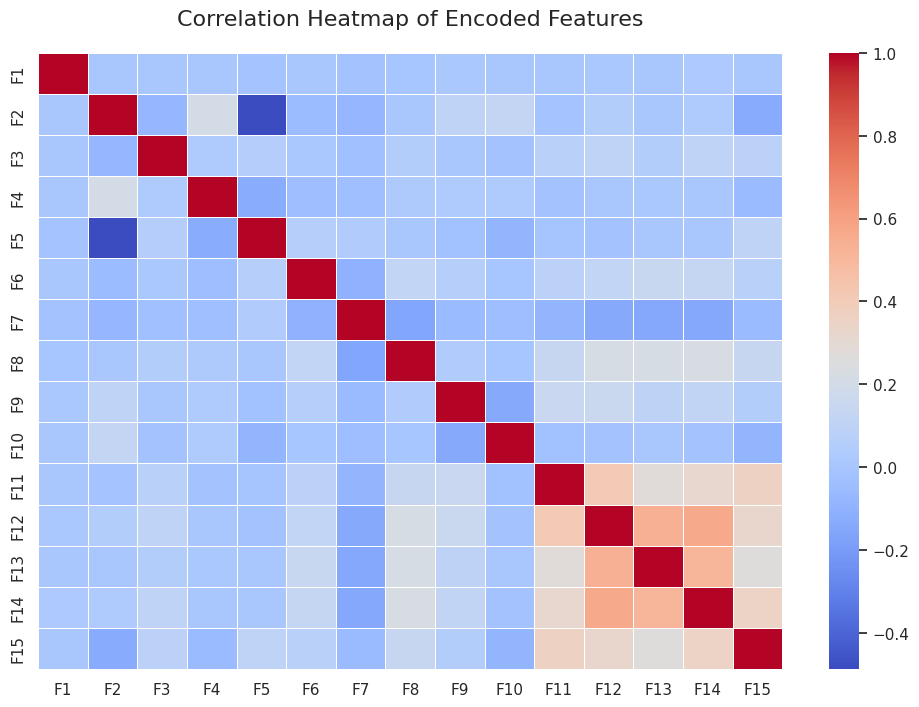


Column label mapping:
F1: Duration (in seconds)
F2: What is your age (# years)?
F3: What is your gender? - Selected Choice
F4: In which country do you currently reside?
F5: Are you currently a student? (high school, university, or graduate)
F6: What products or platforms did you find to be most helpful when you first started studying data science?  (Select all that apply) - Selected Choice - Online courses (Coursera, EdX, etc)
F7: What products or platforms did you find to be most helpful when you first started studying data science?  (Select all that apply) - Selected Choice - Video platforms (YouTube, Twitch, etc)
F8: What products or platforms did you find to be most helpful when you first started studying data science?  (Select all that apply) - Selected Choice - Kaggle (notebooks, competitions, etc)
F9: What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
F10: Have you ever published any academic research (papers, preprin

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlations only on numeric columns
corr = df_encoded.corr(numeric_only=True)

# Shorten column names for plotting
short_labels = [f"F{i}" for i in range(1, len(corr.columns) + 1)]
label_map = dict(zip(corr.columns, short_labels))

corr_short = corr.rename(index=label_map, columns=label_map)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_short, annot=False, cmap="coolwarm", linewidths=0.5, cbar=True)

plt.title("Correlation Heatmap of Encoded Features", fontsize=16, pad=20)
plt.show()

# Print legend of mappings
print("\nColumn label mapping:")
for orig, short in label_map.items():
    print(f"{short}: {orig}")


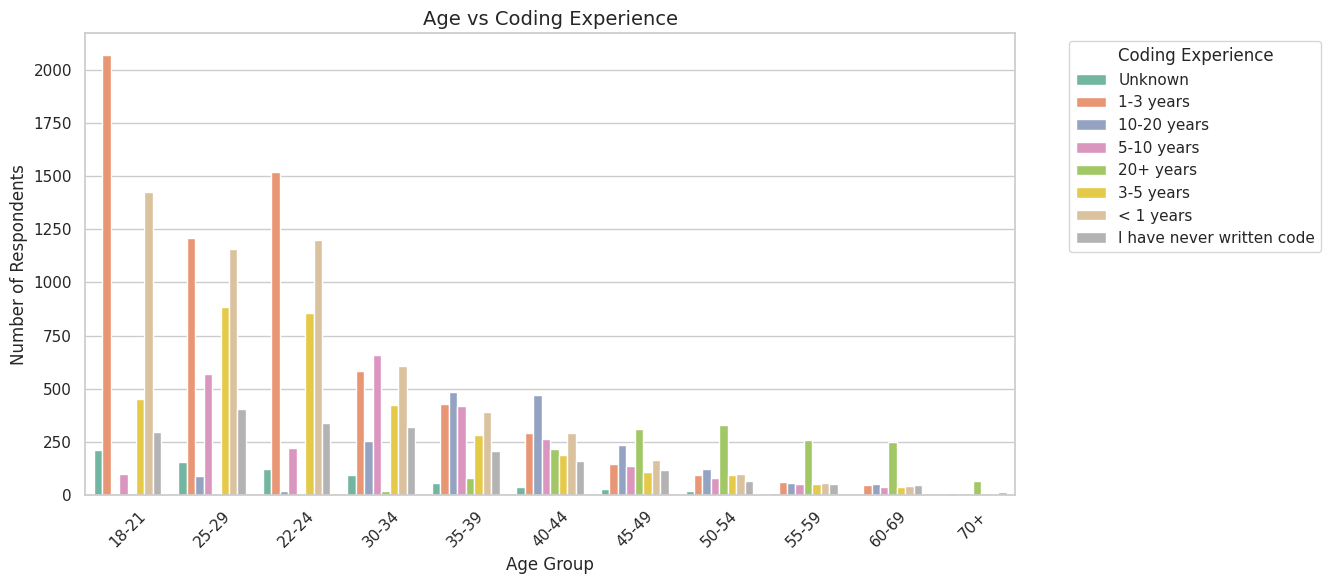

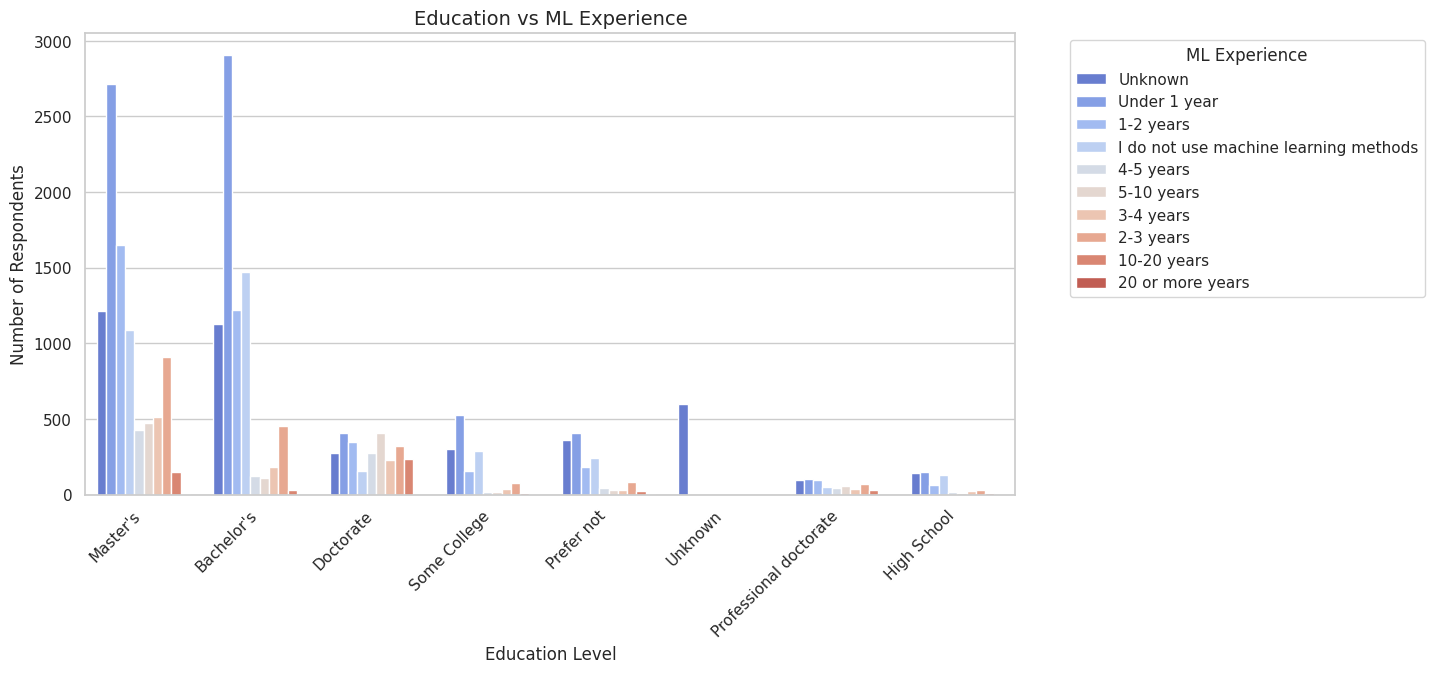

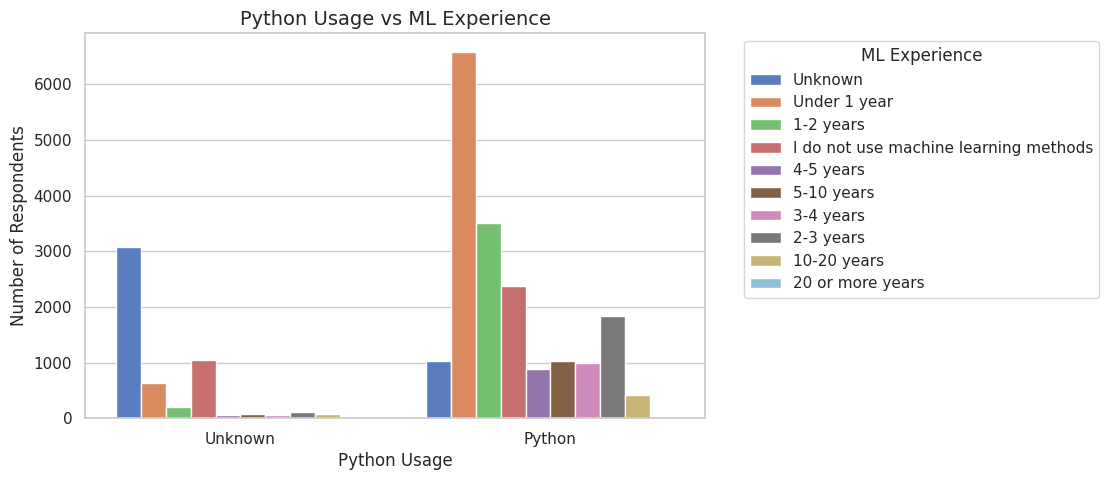

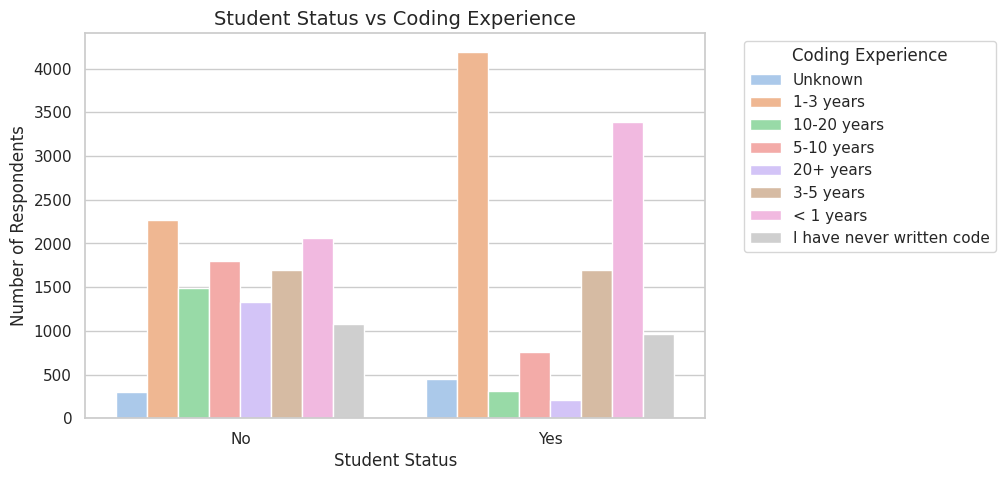

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Shorten long education labels
edu_label_map = {
    "Some college/university study without earning a bachelor’s degree": "Some College",
    "Bachelor’s degree": "Bachelor's",
    "Master’s degree": "Master's",
    "Doctoral degree": "Doctorate",
    "Professional degree": "Professional",
    "I prefer not to answer": "Prefer not",
    "No formal education past high school": "High School"
}

df["Edu_Short"] = df["What is the highest level of formal education that you have attained or plan to attain within the next 2 years?"].replace(edu_label_map)

# 1. Age distribution vs coding experience
plt.figure(figsize=(12,6))
sns.countplot(
    x="What is your age (# years)?",
    hue="For how many years have you been writing code and/or programming?",
    data=df,
    order=df["What is your age (# years)?"].value_counts().index,
    palette="Set2"
)
plt.title("Age vs Coding Experience", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.legend(title="Coding Experience", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# 2. Education vs ML experience (short labels)
plt.figure(figsize=(12,6))
sns.countplot(
    x="Edu_Short",
    hue="For how many years have you used machine learning methods?",
    data=df,
    order=df["Edu_Short"].value_counts().index,
    palette="coolwarm"
)
plt.title("Education vs ML Experience", fontsize=14)
plt.xlabel("Education Level")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45, ha="right")
plt.legend(title="ML Experience", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# 3. Python usage vs ML experience
plt.figure(figsize=(8,5))
sns.countplot(
    x="What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python",
    hue="For how many years have you used machine learning methods?",
    data=df,
    palette="muted"
)
plt.title("Python Usage vs ML Experience", fontsize=14)
plt.xlabel("Python Usage")
plt.ylabel("Number of Respondents")
plt.legend(title="ML Experience", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# 4. Student Status vs Coding Experience
plt.figure(figsize=(8,5))
sns.countplot(
    x="Are you currently a student? (high school, university, or graduate)",
    hue="For how many years have you been writing code and/or programming?",
    data=df,
    palette="pastel"
)
plt.title("Student Status vs Coding Experience", fontsize=14)
plt.xlabel("Student Status")
plt.ylabel("Number of Respondents")
plt.legend(title="Coding Experience", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


📊 Auto Top 5 Insights:

1) Age: top groups — 18-21, 25-29, 22-24 (counts: 4558, 4472, 4283).
2) Gender: Man is most common (76.1%).
3) Countries: top 5 — India, United States of America, Other, Brazil, Nigeria.
4) Python usage: approx 77.7% of respondents use Python regularly.
5) Education: Master’s & Bachelor’s combined ≈ 69.9% of respondents.


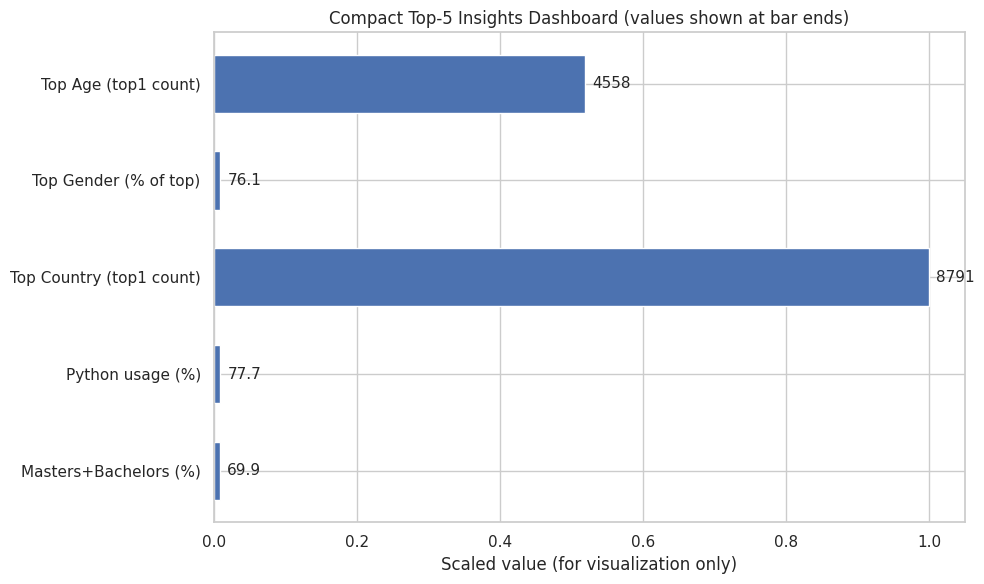

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare metrics (use df and df_encoded from earlier cells)
# 1) Top Age groups (top 2 combined as "18-29" insight will be computed in text)
age_counts = df["What is your age (# years)?"].value_counts()
top_age = age_counts.head(5)

# 2) Gender distribution (percent)
gender_counts = df["What is your gender? - Selected Choice"].value_counts()
gender_pct = (gender_counts / gender_counts.sum() * 100).round(1)

# 3) Top countries (top 5)
country_counts = df["In which country do you currently reside?"].value_counts()
top_countries = country_counts.head(5)

# 4) Python usage percent
py_counts = df["What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python"].value_counts()
py_pct = 0
if 'Python' in py_counts.index:
    # if original column still had 'Python' label, else check encoded view
    py_pct = (py_counts.get('Python', 0) / len(df) * 100).round(1)
else:
    # fallback: treat values '1' as yes if column is binary encoded earlier
    py_ones = df["What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python"].isin([1, '1', 'Yes', 'True']).sum()
    py_pct = round(py_ones / len(df) * 100, 1)

# 5) Education summary: share Master's + Bachelor's combined %
edu_col = "What is the highest level of formal education that you have attained or plan to attain within the next 2 years?"
edu_counts = df[edu_col].value_counts()
masters_bachelors = edu_counts.get("Master’s degree", 0) + edu_counts.get("Master's degree", 0) + edu_counts.get("Bachelor’s degree", 0) + edu_counts.get("Bachelor's degree", 0)
edu_pct = round(masters_bachelors / len(df) * 100, 1)

# Compose top-5 insight text lines (programmatic + a short human phrasing)
insights_text = [
    f"1) Age: top groups — {', '.join(top_age.index[:3].tolist())} (counts: {', '.join(map(str, top_age.values[:3]))}).",
    f"2) Gender: {gender_counts.idxmax()} is most common ({gender_pct.max()}%).",
    f"3) Countries: top 5 — {', '.join(top_countries.index.tolist())}.",
    f"4) Python usage: approx {py_pct}% of respondents use Python regularly.",
    f"5) Education: Master’s & Bachelor’s combined ≈ {edu_pct}% of respondents."
]

print("📊 Auto Top 5 Insights:\n")
for line in insights_text:
    print(line)

# Compact dashboard: 5 horizontal bars with counts/percents
plt.figure(figsize=(10,6))
labels = ["Top Age (top1 count)", "Top Gender (% of top)", "Top Country (top1 count)", "Python usage (%)", "Masters+Bachelors (%)"]
values = [
    int(top_age.values[0]),
    float(gender_pct.max()),
    int(top_countries.values[0]),
    float(py_pct),
    float(edu_pct)
]

# Normalize for plotting aesthetics (so bars are visually comparable)
max_val = max(values)
scaled = [v / max_val for v in values]

y_pos = np.arange(len(labels))
plt.barh(y_pos, scaled, height=0.6)
for i, (s, orig) in enumerate(zip(scaled, values)):
    plt.text(s + 0.01, i, f"{orig}", va='center', fontsize=11)

plt.yticks(y_pos, labels)
plt.title("Compact Top-5 Insights Dashboard (values shown at bar ends)")
plt.gca().invert_yaxis()
plt.xlabel("Scaled value (for visualization only)")
plt.tight_layout()
plt.show()


In [ ]:
df.to_csv("kaggle_survey_cleaned.csv", index=False)
df_encoded.to_csv("kaggle_survey_encoded.csv", index=False)

print("Saved files:")
print("- kaggle_survey_cleaned.csv")
print("- kaggle_survey_encoded.csv")

# If running in Colab, you can create links to download. (This path is in session storage.)


Saved files:
- kaggle_survey_cleaned.csv
- kaggle_survey_encoded.csv
